## <p style="text-align: center;">  **TECH 3 PROJECT** </p>

In [18]:
#Getting modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pandas as pd
import math
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [19]:
#importing the data files

employed = pd.read_excel("Employment.xlsx")
grad = pd.read_csv("graduates.csv")
unemployed = pd.read_csv("unemployment_rates_among_25_to_34_1993_2017.csv")

employed

,1,Number in Thousands(2010),Percent of Number Error(2010),Percentage distribution(2010),Distribution Error(2010),Unemployment rate for the civilian labor force(2010),Rate Error(2010),Current Dollars in 2018 value (2010),Current Error(2010),Constant Dollars (2010),...,"Number, in thousands(2018)",Percent of Number Error(2018),Percentage distribution (2018),Distribution Error (2018),Unemployment rate for the civilian labor force(2018),Rate Error (2018),Median annual earnings of full-time year-round workers(2018),Median Error (2018),Percent of all 25- to 29-year-olds with degree in specific field(2018),Percent Error (2018)
0,"Total, all bachelor's degrees",6365.532,30.510960,100.000000,(†),5.5546,0.131435,43730.0,683.858385,50360.0,...,8103.232,40.150400,100.000000,(†),2.92558,0.0757424,50600.0,4.0,34.836770,0.159048
1,Agriculture,58.750,2.772481,0.922939,0.0429443,3.80018,0.992642,40150.0,423.899441,46240.0,...,78.201,3.867115,0.965059,0.0469603,1.75441,0.715963,45380.0,1856.0,0.336196,0.016620
2,Architecture,47.179,2.541278,0.741164,0.0395761,13.7791,2.48764,44300.0,2686.497190,51020.0,...,59.751,3.620732,0.737372,0.0439884,1.84892,0.697686,52170.0,1239.0,0.256877,0.015508
3,"Area, ethnic, and civilization studies",27.988,1.901892,0.439680,0.0293446,5.15993,1.60962,41250.0,3100.203454,47510.0,...,31.083,2.225441,0.383588,0.0274918,1.67568,0.770754,50140.0,1018.0,0.133630,0.009571
4,"Arts, fine and commercial",334.214,6.991615,5.250370,0.107774,6.78082,0.551759,37140.0,803.062509,42770.0,...,439.651,8.509503,5.425625,0.100599,3.6533,0.414964,42520.0,1152.0,1.890113,0.036407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Theology and religious vocations,27.777,1.989934,0.436366,0.031282,3.88758,1.88094,32790.0,1348.996710,37770.0,...,34.755,2.200042,0.428903,0.0263824,1.96375,0.952334,35230.0,919.0,0.149416,0.009414
62,Other fields,26.493,1.990560,0.416195,0.0311488,8.9754,2.31192,36660.0,2542.331624,42220.0,...,26.234,2.092123,0.323747,0.0257252,5.29454,2.43726,40250.0,5725.0,0.112783,0.008992
63,STEM status of field\2\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,STEM field,1345.027,13.699305,21.129844,0.207749,5.00318,0.259765,53150.0,966.802190,61210.0,...,1900.985,20.967604,23.459590,0.218764,3.16374,0.145908,60760.0,216.0,8.172563,0.087789


In [20]:
#grad

In [21]:
#unemployed

In [84]:
#masking employed dataset in order to begin question
#Does the entry pay-wage of a major affect its employment chances?
employed_2010_features = employed.iloc[1:62,[1,5,9]]
employed_2010_features = employed_2010_features.drop(index = [17,23,51,55])
employed_2018_features = employed.iloc[1:62,[13,17,19]]
employed_2018_features = employed_2018_features.drop(index = [17,23,51,55])
employed_labels = employed.iloc[1:62,0]
employed_labels = employed_labels.drop(index = 51)
employed_2018_features

,"Number, in thousands(2018)",Unemployment rate for the civilian labor force(2018),Median annual earnings of full-time year-round workers(2018)
1,78.201,1.75441,45380.0
2,59.751,1.84892,52170.0
3,31.083,1.67568,50140.0
4,439.651,3.6533,42520.0
5,314.497,3.71549,40500.0
6,125.154,3.50264,48140.0
7,1431.971,2.81493,54660.0
8,266.418,3.72158,50260.0
9,225.612,2.33821,60000.0
10,342.959,2.35451,50600.0


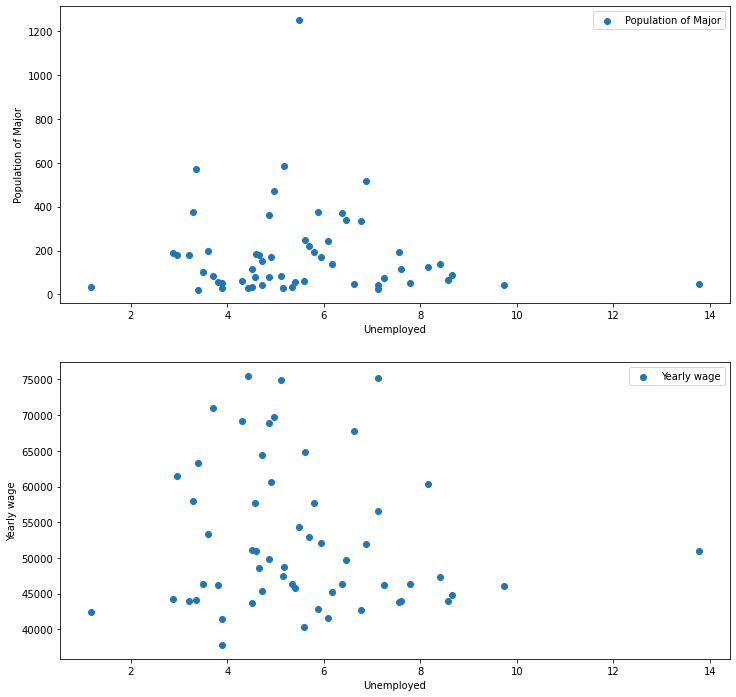

In [86]:
#just in case class functions don't work
f, axs = plt.subplots(1,2,figsize=(12,12))
plt.subplot(211)
plt.scatter(employed_2010_features['Unemployment rate for the civilian labor force(2010)'],employed_2010_features['Number in Thousands(2010)'],label = "Population of Major")
plt.xlabel('Unemployed')
plt.ylabel('Population of Major')
plt.legend()
plt.subplot(212)
plt.scatter(employed_2010_features['Unemployment rate for the civilian labor force(2010)'],employed_2010_features['Constant Dollars (2010)'], label = "Yearly wage")
plt.xlabel('Unemployed')
plt.ylabel('Yearly wage')

plt.legend()

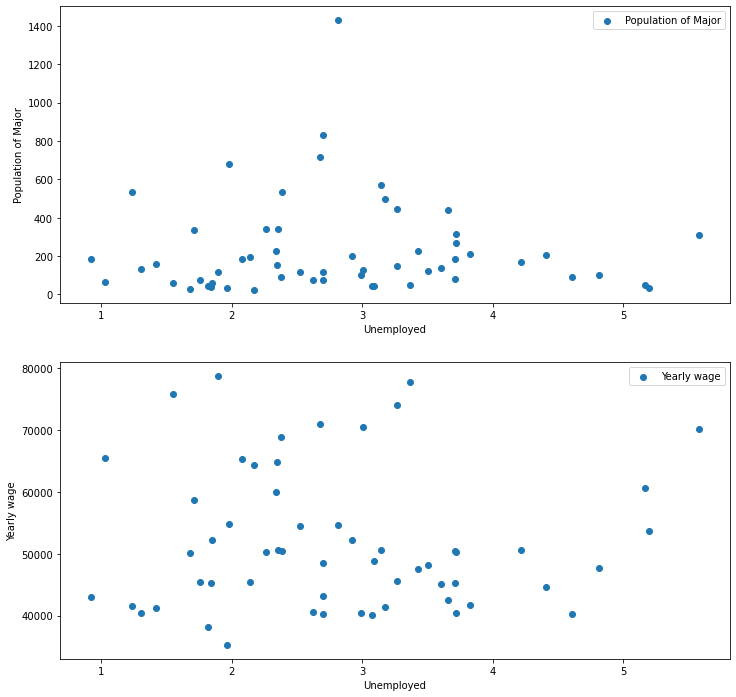

In [87]:
f, axs = plt.subplots(1,2,figsize=(12,12))
plt.subplot(211)
plt.scatter(employed_2018_features['Unemployment rate for the civilian labor force(2018)'],employed_2018_features['Number, in thousands(2018)'],label = "Population of Major")
plt.xlabel('Unemployed')
plt.ylabel('Population of Major')
plt.legend()
plt.subplot(212)
plt.scatter(employed_2018_features['Unemployment rate for the civilian labor force(2018)'],employed_2018_features['Median annual earnings of full-time year-round workers(2018)'], label = "Yearly wage")
plt.xlabel('Unemployed')
plt.ylabel('Yearly wage')

plt.legend()

In [63]:
#Creating a class to allow simple compact lines of code to get models

class Data_intake():
    
    def __init__(self, features,labels):
        self.features = features
        self.labels = labels
        train_vectors, test_vectors, train_labels, test_labels = train_test_split(self.features, self.labels, test_size = 0.25, random_state = 314519)
        self.train_vectors = train_vectors
        self.test_vectors = test_vectors
        self.train_labels = train_labels
        self.test_labels = test_labels

    def SVM(self):
        clf = svm.SVC(C=1, class_weight='balanced', gamma=1e-06, kernel='linear')
        clf.fit(self.train_vectors,self.train_labels)

        predict = clf.predict(self.test_vectors)
        print(classification_report(self.test_labels,predict))
        print(confusion_matrix(self.test_labels,predict))
        

        
    def PCA(self,n_components):
        pca = PCA(n_components = n_components)
        pca.fit(self.train_vectors,self.train_labels)
        pca_train_vectors = pca.transform(self.train_vectors)
        pca_test_vectors = pca.transform(self.test_vectors)

        #fitting and evaluting to a SVC model
        clf = svm.SVC(C=1, class_weight='balanced', gamma=1e-06, kernel='linear')
        clf.fit(pca_train_vectors,self.train_labels)

        prediction = clf.predict(pca_test_vectors)


        #printing results
        print(pca.explained_variance_ratio_)
        print(np.sum(pca.explained_variance_ratio_))
        print(classification_report(self.test_labels,prediction))
        print(confusion_matrix(self.test_labels,prediction))
        
    def scatter(self,x,y):
        plt.scatter(x,y)
        plt.grid()
        plt.xlabel('{}'.format(x))
        plt.ylabel('{}'.format(y))
        plt.title('{} vs {}'.format(y,x))
        

In [64]:
Data_2010 = Data_intake(employed_2010_features,employed_labels)
Data_2018 = Data_intake(employed_2018_features,employed_labels)

In [65]:
Data_2010.SVM()


                                                          precision    recall  f1-score   support

                                             Accounting        0.00      0.00      0.00       1.0
                            Anthropology and archeology        0.00      0.00      0.00       1.0
                                                Biology        0.00      0.00      0.00       0.0
                                      Business, general        0.00      0.00      0.00       1.0
                                   Chemical engineering        0.00      0.00      0.00       1.0
                                   Computer engineering        0.00      0.00      0.00       0.0
                               Engineering technologies        0.00      0.00      0.00       1.0
                                     Engineering, other        0.00      0.00      0.00       1.0
                                      General education        0.00      0.00      0.00       1.0
                   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
Data_2010.PCA(3)

[9.99512898e-01 4.87045657e-04 5.61272246e-08]
0.9999999999999999
                                                          precision    recall  f1-score   support

                                             Accounting        0.00      0.00      0.00       1.0
                            Anthropology and archeology        0.00      0.00      0.00       1.0
                                                Biology        0.00      0.00      0.00       0.0
                                      Business, general        0.00      0.00      0.00       1.0
                                   Chemical engineering        0.00      0.00      0.00       1.0
                                   Computer engineering        0.00      0.00      0.00       0.0
                               Engineering technologies        0.00      0.00      0.00       1.0
                                     Engineering, other        0.00      0.00      0.00       1.0
                                      General educa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
